In [2]:
pip install pandas openpyxl


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   -------------- ------------------------- 92.2/250.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Parameters
user_id = 1
user_name = 'User_1'
num_days = 30
base_date = datetime(2024, 8, 1)

# Create empty list to hold data
data = []

# Generate data for one user
for day in range(num_days):
    date = base_date + timedelta(days=day)
    transportation_footprint = round(np.random.uniform(1, 10), 2)
    electricity_usage = round(np.random.uniform(10, 30), 2)
    waste_generation = round(np.random.uniform(0.5, 2), 2)
    diet_footprint = round(np.random.uniform(1, 5), 2)
    housing_footprint = round(np.random.uniform(2, 6), 2)

    total_carbon_footprint = (transportation_footprint + 
                              electricity_usage + 
                              waste_generation + 
                              diet_footprint + 
                              housing_footprint)

    data.append({
        'User_ID': user_id,
        'User_Name': user_name,
        'Date': date.strftime('%Y-%m-%d'),
        'Transportation_Footprint': transportation_footprint,
        'Electricity_Usage': electricity_usage,
        'Waste_Generation': waste_generation,
        'Diet_Footprint': diet_footprint,
        'Housing_Footprint': housing_footprint,
        'Total_Carbon_Footprint': round(total_carbon_footprint, 2)
    })

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel
df.to_excel('D:\\sample\\carbon_footprint_user_1_month.xlsx', index=False)



In [2]:
import os
print(os.getcwd())


D:\sample


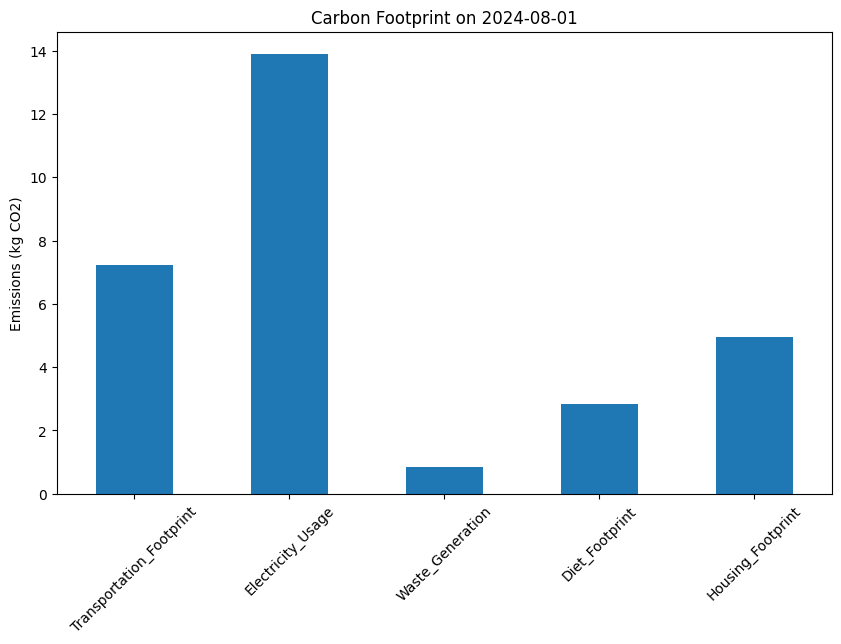

C:\Users\chethan\AppData\Local\Temp\ipykernel_22972\2614457452.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  day_data[['Transportation_Footprint', 'Electricity_Usage', 'Waste_Generation', 'Diet_Footprint', 'Housing_Footprint']].plot(kind='pie', autopct='%1.1f%%')


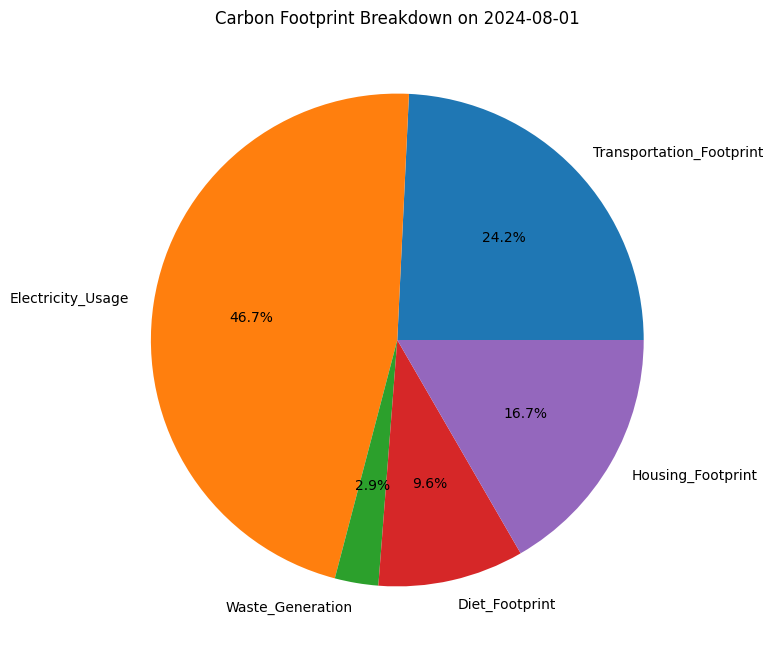

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('D:\\sample\\carbon_footprint_user_1_month.xlsx')

# Specify the date you want to visualize
specific_date = '2024-08-01'
day_data = df[df['Date'] == specific_date].iloc[0]

# Bar Chart
plt.figure(figsize=(10, 6))
day_data[['Transportation_Footprint', 'Electricity_Usage', 'Waste_Generation', 'Diet_Footprint', 'Housing_Footprint']].plot(kind='bar')
plt.title(f'Carbon Footprint on {specific_date}')
plt.ylabel('Emissions (kg CO2)')
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
day_data[['Transportation_Footprint', 'Electricity_Usage', 'Waste_Generation', 'Diet_Footprint', 'Housing_Footprint']].plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Carbon Footprint Breakdown on {specific_date}')
plt.ylabel('')
plt.show()


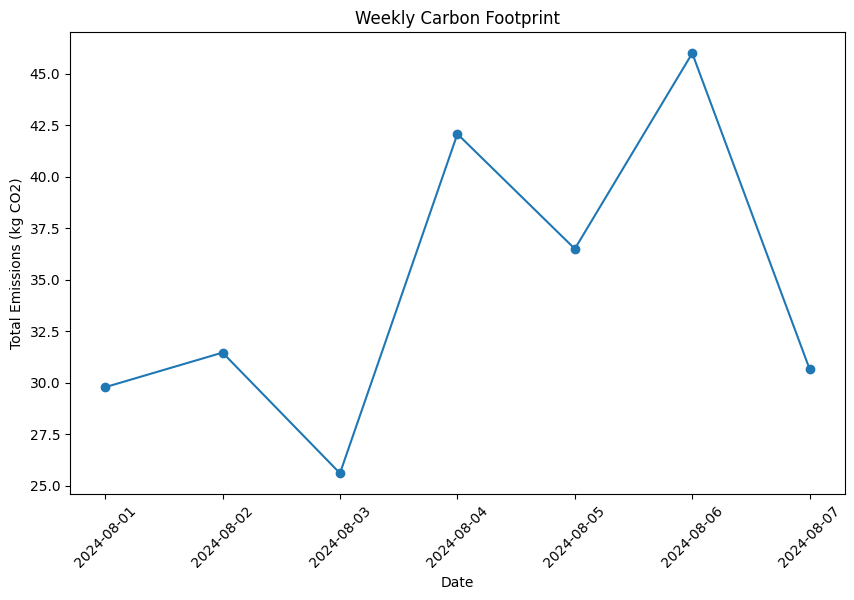

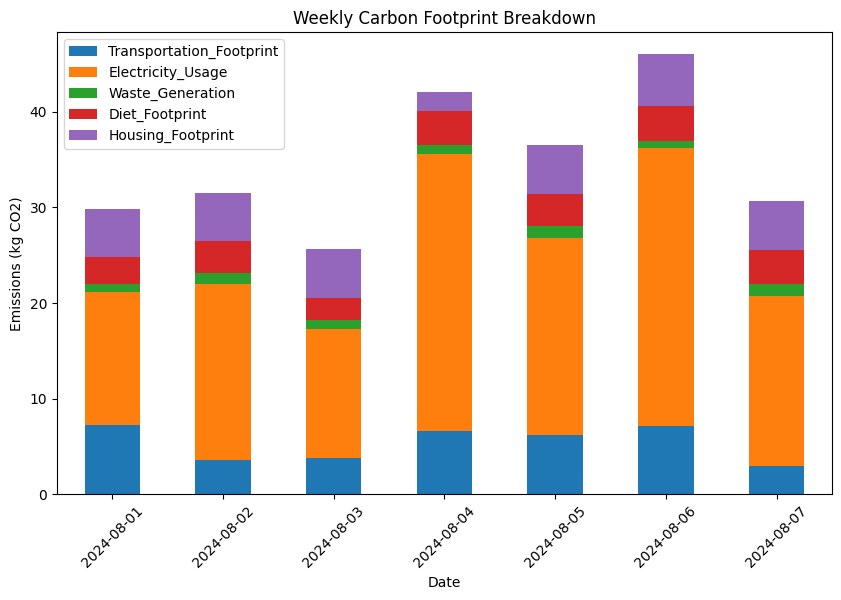

In [5]:
# Specify the week range
start_week = '2024-08-01'
end_week = '2024-08-07'
weekly_data = df[(df['Date'] >= start_week) & (df['Date'] <= end_week)]

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Date'], weekly_data['Total_Carbon_Footprint'], marker='o')
plt.title('Weekly Carbon Footprint')
plt.xlabel('Date')
plt.ylabel('Total Emissions (kg CO2)')
plt.xticks(rotation=45)
plt.show()

# Stacked Bar Chart
weekly_data.plot(x='Date', kind='bar', stacked=True, 
                 y=['Transportation_Footprint', 'Electricity_Usage', 'Waste_Generation', 'Diet_Footprint', 'Housing_Footprint'], figsize=(10, 6))
plt.title('Weekly Carbon Footprint Breakdown')
plt.ylabel('Emissions (kg CO2)')
plt.xticks(rotation=45)
plt.show()


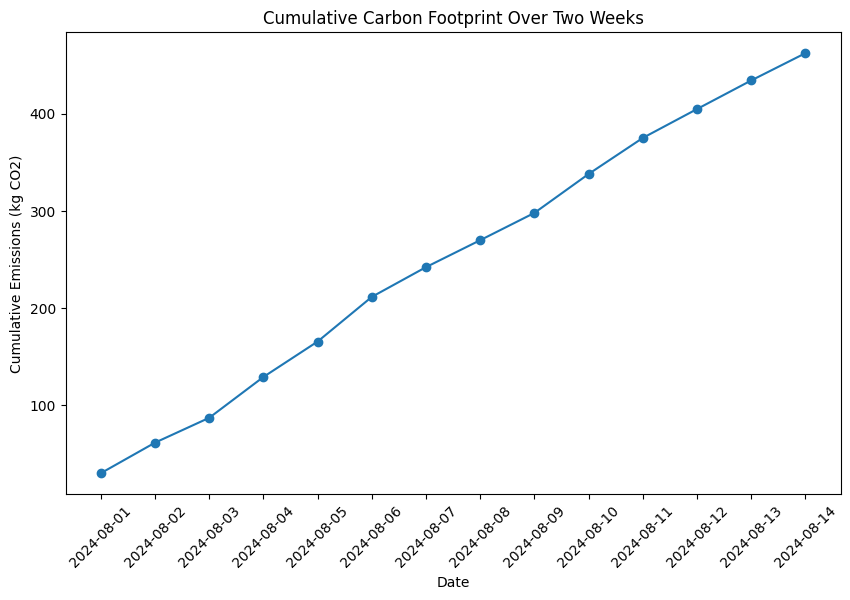

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [6]:
# Specify the two-week range
start_combined = '2024-08-01'
end_combined = '2024-08-14'
combined_data = df[(df['Date'] >= start_combined) & (df['Date'] <= end_combined)]

# Cumulative Line Chart
cumulative = combined_data.groupby('Date').sum().cumsum()
plt.figure(figsize=(10, 6))
plt.plot(cumulative.index, cumulative['Total_Carbon_Footprint'], marker='o')
plt.title('Cumulative Carbon Footprint Over Two Weeks')
plt.xlabel('Date')
plt.ylabel('Cumulative Emissions (kg CO2)')
plt.xticks(rotation=45)
plt.show()

# Heatmap
import seaborn as sns
heatmap_data = combined_data.pivot("Date", "User_Name", "Total_Carbon_Footprint")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Carbon Footprint Over Two Weeks')
plt.show()
# Specify the two-week range
start_combined = '2024-08-01'
end_combined = '2024-08-14'
combined_data = df[(df['Date'] >= start_combined) & (df['Date'] <= end_combined)]

# Cumulative Line Chart
cumulative = combined_data.groupby('Date').sum().cumsum()
plt.figure(figsize=(10, 6))
plt.plot(cumulative.index, cumulative['Total_Carbon_Footprint'], marker='o')
plt.title('Cumulative Carbon Footprint Over Two Weeks')
plt.xlabel('Date')
plt.ylabel('Cumulative Emissions (kg CO2)')
plt.xticks(rotation=45)
plt.show()

# Heatmap
import seaborn as sns
heatmap_data = combined_data.pivot("Date", "User_Name", "Total_Carbon_Footprint")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Carbon Footprint Over Two Weeks')
plt.show()


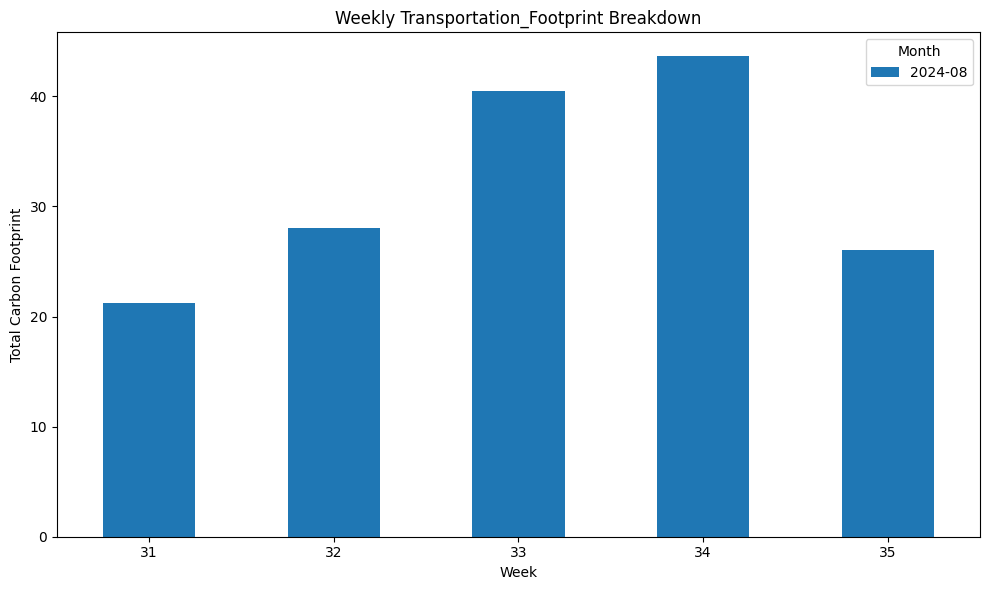

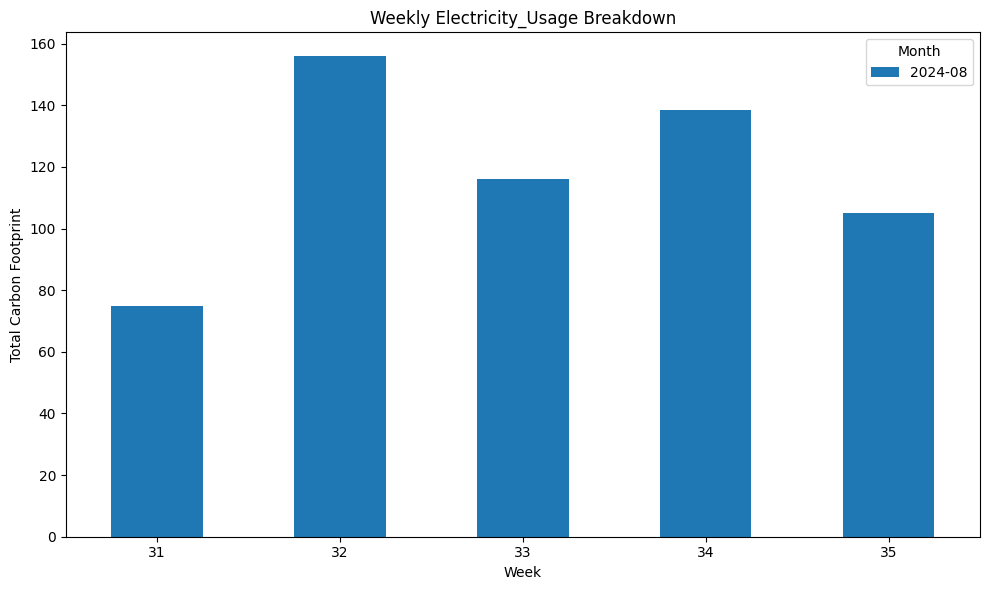

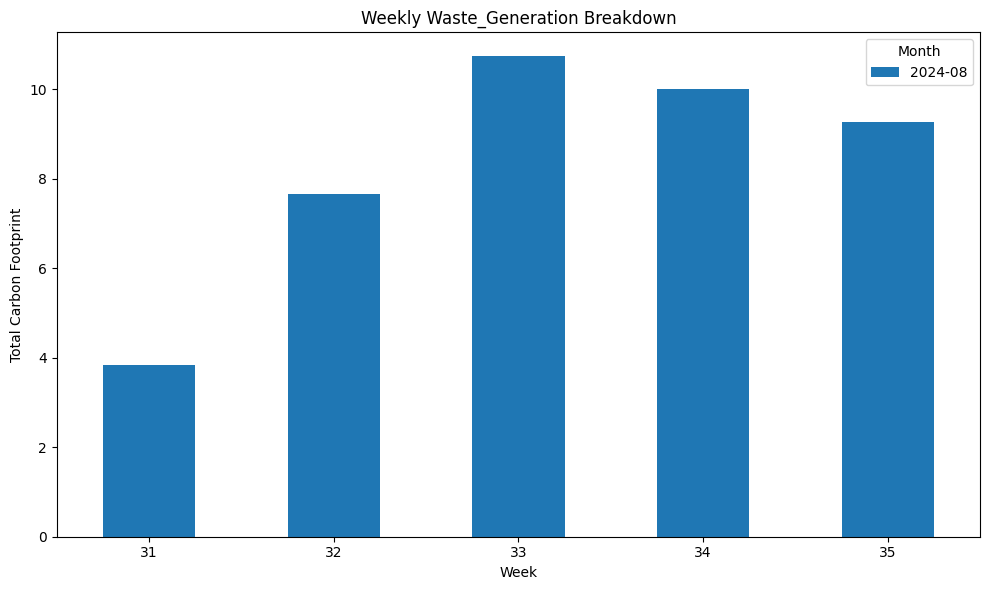

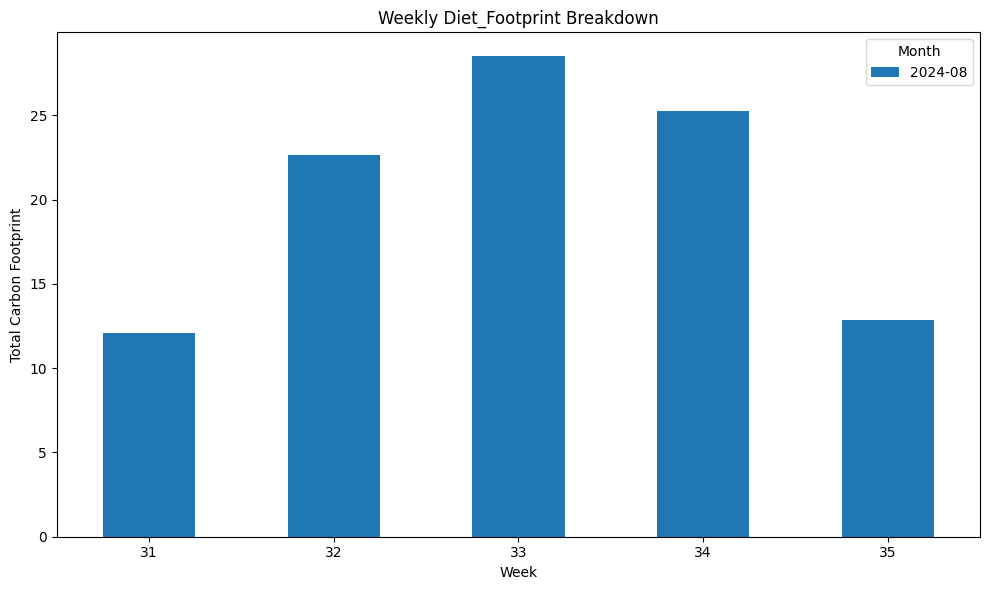

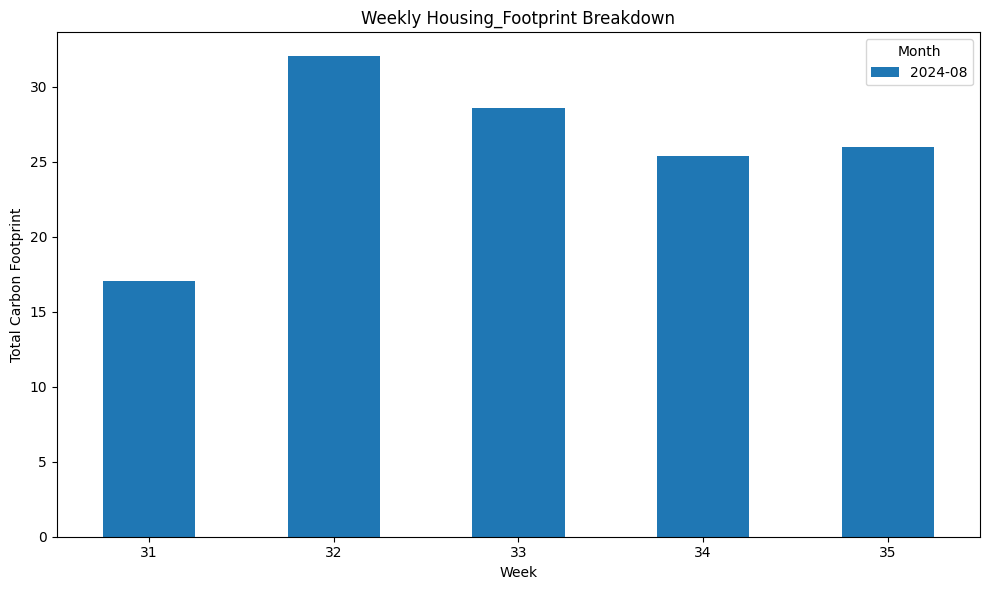

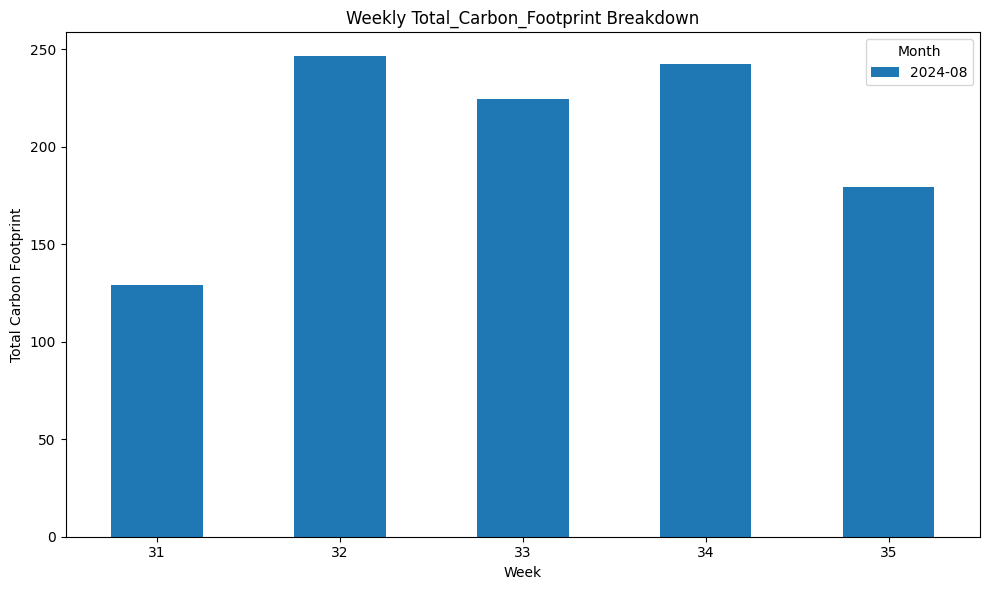

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('D:\\sample\\carbon_footprint_user_1_month.xlsx')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Month' and 'Week' columns for grouping
df['Month'] = df['Date'].dt.to_period('M')
df['Week'] = df['Date'].dt.isocalendar().week

# Specify the numeric columns you want to aggregate
numeric_columns = ['Transportation_Footprint', 'Electricity_Usage', 'Waste_Generation', 'Diet_Footprint', 'Housing_Footprint', 'Total_Carbon_Footprint']

# Group by 'Month' and 'Week', summing only the numeric columns
weekly_data = df.groupby(['Month', 'Week'])[numeric_columns].sum().reset_index()

# Plotting bar graphs for each attribute
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    weekly_data.pivot(index='Week', columns='Month', values=column).plot(kind='bar', ax=plt.gca(), color=plt.cm.tab10.colors)
    plt.title(f'Weekly {column} Breakdown')
    plt.xlabel('Week')
    plt.ylabel('Total Carbon Footprint')
    plt.legend(title='Month')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
